In [129]:
# Libraries
import pandas as pd #Untuk melakukan proses pada data
import numpy as np #mengelola komputasi matrix
import re #reguler expression untuk proses cleansing
import matplotlib.pyplot as plt #persentasi data berupa grafik/plot
import string 
import nltk
import pickle 
from nltk.corpus import stopwords
from nltk import word_tokenize

In [130]:
data_clean = pd.read_csv('C:/Users/sinag/SKRIPSIKU/preprocessing.csv', encoding='latin1')
data_clean.head()

,id,username,text,sentimen,label
0,1,akhmad Zubaeri,repot orang miskin kerjanya serabutan,negatif,-1
1,2,Amin Udin,setiap desa kasih relawan alat tes pak semua t...,positif,1
2,3,Amin Udin,kesadaran masyarakat rendah salahkan malah pem...,negatif,-1
3,4,Amin Udin,semangat pak jokowi,netral,0
4,5,Amin Udin,ingin hidup normal,netral,0


In [131]:
data_clean['sentimen'].value_counts()

negatif    774
positif    302
netral     261
Name: sentimen, dtype: int64

In [132]:
data_clean.shape

(1337, 5)

In [128]:
# PROSES TF IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import csv

tfidf = TfidfVectorizer()
tf_idf = tfidf.fit_transform(data_clean['text'].astype('U'))

In [112]:
# splitting data latih 80 : uji 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf, data_clean ['label'], test_size=0.2, random_state=5)

In [114]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
predknn = knn.predict(X_test)
print("Confusion Matrix for K Neighbors Classifier:")
cm = confusion_matrix(predknn, y_test)
print(cm)
print("\n")
print("K = 9")
print("Accuracy : ", round(accuracy_score(predknn, y_test)*100,3))
print("Precision : ", round(precision_score(predknn, y_test, average = 'macro')*100,3))
print("Recall : ", round(recall_score(predknn, y_test, average = 'macro')*100,3))
print("\n")
print("Classification Report:")
print(classification_report(predknn,y_test)) 

Confusion Matrix for K Neighbors Classifier:
[[622   6   9]
 [  0 179   3]
 [  0   0 251]]


K = 9
Accuracy :  98.318
Precision :  97.398
Recall :  98.666


Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99       637
           0       0.97      0.98      0.98       182
           1       0.95      1.00      0.98       251

    accuracy                           0.98      1070
   macro avg       0.97      0.99      0.98      1070
weighted avg       0.98      0.98      0.98      1070



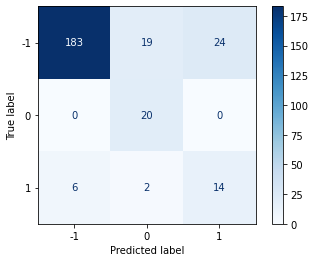

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.show()

In [88]:
# menyimpan model knn
import pickle

with open('knn9.pickle', 'wb') as r:
    pickle.dump(knn,r)

In [89]:
with open('knn9.pickle', 'rb') as r:
    knnp = pickle.load(r)

In [90]:
predknn = knnp.predict(X_test)

round(accuracy_score(y_test,predknn),3)

0.802

In [79]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':predknn})
df

,Actual,Predicted
299,negatif,negatif
802,negatif,negatif
51,netral,negatif
399,negatif,negatif
370,netral,negatif
...,...,...
1187,positif,negatif
529,negatif,negatif
577,negatif,negatif
665,positif,negatif


In [80]:
df.to_csv('C:/Users/sinag/SKRIPSIKU/sentimenKNN.csv', index=False)
data_clean = pd.read_csv('C:/Users/sinag/SKRIPSIKU/sentimenKNN.csv', encoding='latin1')
data_clean.head()

,Actual,Predicted
0,negatif,negatif
1,negatif,negatif
2,netral,negatif
3,negatif,negatif
4,netral,negatif
